# Quadratic Approximation

> Credit to Anders Munk-Nielsen. I'm just replicating his presentation here for my own learning of quadratic approximation

Lecture 3 of SR mentions an estimation method called [quap](https://www.rdocumentation.org/packages/rethinking/versions/2.13/topics/quap). I've found a bloated Python library called [pymc3-quap](https://pypi.org/project/pymc3-quap/) that depends on way too many things.

Some source on the topic

- Source code for [quap.py](https://github.com/rasmusbergpalm/pymc3-quap/blob/main/quap/quap.py) in pymc3-quap
- Video on [Numerical Python: Linear and Quadratic Approximations (Anders Munk-Nielsen)](https://youtu.be/rzmRTCrNkk0)
- Video on [Taylor series (3blue1brown)](https://youtu.be/3d6DsjIBzJ4)

In [3]:
import numpy as np
import matplotlib.pyplot as plt

## Numerical derivatives

### 1st derivative

In [8]:
def d(func, x0, h=1e-7):
    """
    Numerical 1st derivative
    """
    if x0 != 0:
        x1 = x0 + x0 * h
    else:
        x1 = x0 + h
    step = x1 - x0
    grad = func(x1) - func(x0)
    return grad / step

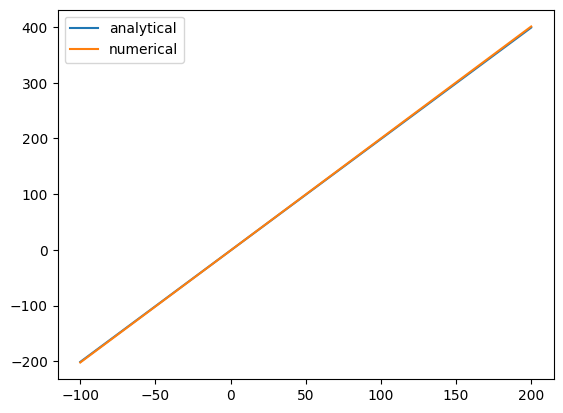

In [9]:
poly2 = lambda x: x**2 - 1*x
df = lambda x: 2*x - 1
h = 0.01

X = np.linspace(-100,200, 100)
Y1 = [df(x) for x in X]
Y2 = [d(poly2, x, h=h) for x in X]
plt.plot(X, Y1, label='analytical')
plt.plot(X, Y2, label='numerical')
plt.legend()
plt.show()

### 2nd derivative

In [10]:
def dd(func, x0, outer_h=1e-6, inner_h=1e-8):
    """
    Numerical 2nd derivative
    """
    df = lambda x: d(func, x, h=inner_h)
    return d(df, x0, h=outer_h)

In [12]:
ddf = lambda x: 2
ddf(1.0), dd(poly2, 1.0)

(2, 1.9983994598550046)

## Approximating functions

$$
\begin{align}
Linear: & \quad \bar{f}(x) = f(x_0) + f'(x0) (x - x_0) \\
Quadratic: & \quad \bar{f}(x) = f(x_0) + f'(x0)(x - x_0) + \frac{1}{2}f''(x0)(x - x_0)^2 \\
\end{align}
$$

### Test functions

In [39]:
def plot_approx(X, f_real, f_approx, kind='Numerical'):
    x0 = X.mean()
    Y_real = f_real(X)
    Y_approx = f_approx(X, f_real, x0=x0)
    plt.plot(X, Y_real, label='real')
    plt.plot(X, Y_approx, label='approx')
    plt.legend()
    plt.title(f'{kind} approximation')
    plt.show()

### Linear approximation

In [32]:
@np.vectorize
def f_l(x, f, x0, h=1e-8):
    """
    Linear approximation of f near x0
    """
    y0 = f(x0)
    g0 = d(f, x0, h)
    return y0 + g0 * (x-x0)

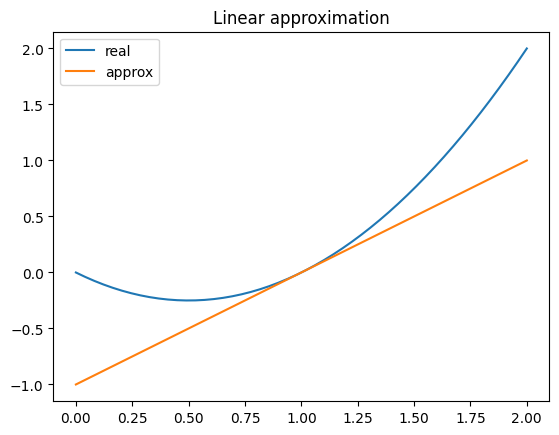

In [40]:
@np.vectorize
def func_q2(x):
    return x**2 - x

f_real = func_q2

X = np.linspace(0, 2)
plot_approx(X, f_real, f_approx=f_l, kind='Linear')

### Quadratic approximation

In [33]:
@np.vectorize
def f_q(x, f, x0, outer_h=1e-6, inner_h=1e-8):
    """
    Linear approximation of f near x0
    """
    y0 = f(x0)
    g0 = d(f, x0, h=inner_h)
    h0 = dd(f, x0, outer_h=outer_h, inner_h=inner_h)
    return y0 + g0 * (x-x0) + 0.5 * h0 * (x-x0)**2

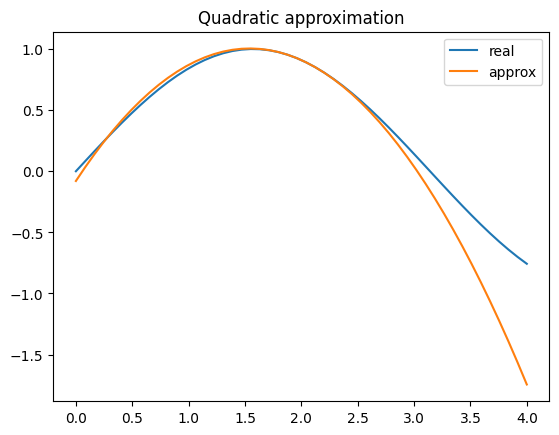

In [42]:
X = np.linspace(0, 4)
f_real = np.sin
plot_approx(X, f_real, f_approx=f_q, kind='Quadratic')